**Fecha:** 3/2/2025

**Nombre:** Diego Martinez

**Clase:** procesamiento de datos

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import mean, col, split, count, when, lit, isnan

#se llaman las librerías necesarias para poder ejecutar el código

In [0]:
df00 = spark.read.table("stroke_pyspark_csv")
df00.columns

#se lee la base de datos y se observan las columnas que posee

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

// se cambia los nombres de las columnas


In [0]:
nuevosN = ['id', 'genero', 'edad', 'hipertension', 'enfCardiaca', 'EstCivil', 'trabajo', 'residencia', 'nivelGlucosa', 'IMC', 'fumador', 'paroCardiaco']
df01 = df00
for antes, nuevo in zip(df00.columns, nuevosN) :
    df01 = df01.withColumnRenamed(antes, nuevo)
df01.columns

#se cambian de nombre a las columnas

['id',
 'genero',
 'edad',
 'hipertension',
 'enfCardiaca',
 'EstCivil',
 'trabajo',
 'residencia',
 'nivelGlucosa',
 'IMC',
 'fumador',
 'paroCardiaco']

In [0]:
df01.printSchema()

#se imprimen los tipos de datos que posee cada columna

root
 |-- id: integer (nullable = true)
 |-- genero: string (nullable = true)
 |-- edad: double (nullable = true)
 |-- hipertension: integer (nullable = true)
 |-- enfCardiaca: integer (nullable = true)
 |-- EstCivil: string (nullable = true)
 |-- trabajo: string (nullable = true)
 |-- residencia: string (nullable = true)
 |-- nivelGlucosa: double (nullable = true)
 |-- IMC: string (nullable = true)
 |-- fumador: string (nullable = true)
 |-- paroCardiaco: integer (nullable = true)



Se hacen cambios en los datos

* IMC pasa a ser double
* edad pasa a ser integer

In [0]:
df01 = df01.withColumn("edad", df01.edad.cast("int"))
df01 = df01.withColumn("IMC", df01.IMC.cast("double"))
df01.printSchema()

#se modifican los tipos de datos de las columnas edad e IMC

root
 |-- id: integer (nullable = true)
 |-- genero: string (nullable = true)
 |-- edad: integer (nullable = true)
 |-- hipertension: integer (nullable = true)
 |-- enfCardiaca: integer (nullable = true)
 |-- EstCivil: string (nullable = true)
 |-- trabajo: string (nullable = true)
 |-- residencia: string (nullable = true)
 |-- nivelGlucosa: double (nullable = true)
 |-- IMC: double (nullable = true)
 |-- fumador: string (nullable = true)
 |-- paroCardiaco: integer (nullable = true)



In [0]:
df01.show(10)
#se visualizan las 10 primeras filas de la tabla

+-----+------+----+------------+-----------+--------+-------------+----------+------------+----+---------------+------------+
|   id|genero|edad|hipertension|enfCardiaca|EstCivil|      trabajo|residencia|nivelGlucosa| IMC|        fumador|paroCardiaco|
+-----+------+----+------------+-----------+--------+-------------+----------+------------+----+---------------+------------+
| 9046|  Male|  67|           0|          1|     Yes|      Private|     Urban|      228.69|36.6|formerly smoked|           1|
|51676|Female|  61|           0|          0|     Yes|Self-employed|     Rural|      202.21|NULL|   never smoked|           1|
|31112|  Male|  80|           0|          1|     Yes|      Private|     Rural|      105.92|32.5|   never smoked|           1|
|60182|Female|  49|           0|          0|     Yes|      Private|     Urban|      171.23|34.4|         smokes|           1|
| 1665|Female|  79|           1|          0|     Yes|Self-employed|     Rural|      174.12|24.0|   never smoked|      

In [0]:
df01.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df01.columns]).show()
#se observan cuantos valores nulos se poseen en la tabla de datos

+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
| id|genero|edad|hipertension|enfCardiaca|EstCivil|trabajo|residencia|nivelGlucosa|IMC|fumador|paroCardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
|  0|     0|   0|           0|          0|       0|      0|         0|           0|201|      0|           0|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+



La columna IMC presenta datos nulos o imposibles, a pesar que el porcentaje de datos nulos son bajos, se requiere crear una estrategia para remplazar los datos sin la necesidad de eliminarlos

In [0]:
df02 = df01.where("genero <> 'other'")
df02.groupby(["genero"]).count().show()
#se separan los valores significativos de la columna de edad

+------+-----+
|genero|count|
+------+-----+
|Female| 2994|
| Other|    1|
|  Male| 2115|
+------+-----+



In [0]:
avg10f = df02.where((col('genero') == lit('Female')) & (col('edad') < 10)).select(mean(col('IMC'))).collect()
avg20f = df02.where((col('genero') == lit('Female')) & (col('edad') > 10) & (col('edad') < 20)).select(mean(col('IMC'))).collect()
avg30f = df02.where((col('genero') == lit('Female')) & (col('edad') > 10) & (col('edad') < 30)).select(mean(col('IMC'))).collect()
avg40f = df02.where((col('genero') == lit('Female')) & (col('edad') > 10) & (col('edad') < 40)).select(mean(col('IMC'))).collect()
avg50f = df02.where((col('genero') == lit('Female')) & (col('edad') > 10) & (col('edad') < 50)).select(mean(col('IMC'))).collect()
avg60f = df02.where((col('genero') == lit('Female')) & (col('edad') > 10) & (col('edad') < 60)).select(mean(col('IMC'))).collect()
avg70f = df02.where((col('genero') == lit('Female')) & (col('edad') > 10) & (col('edad') < 70)).select(mean(col('IMC'))).collect()
avg80f = df02.where((col('genero') == lit('Female')) & (col('edad') > 10) & (col('edad') < 80)).select(mean(col('IMC'))).collect()
avg90f = df02.where((col('genero') == lit('Female')) & (col('edad') > 10) & (col('edad') < 90)).select(mean(col('IMC'))).collect()

#se calcula el promedio de IMC en distintos grupos de edad

In [0]:
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02["IMC"].isNull()) & (df02["edad"] < 10 ), avg10f[0][0]).otherwise(df02['IMC']))
df03 = df03.withColumn("IMC", when((df03['genero'] == 'Female') & (df03["IMC"].isNull()) & (df03["edad"] < 20 ), avg20f[0][0]).otherwise(df03['IMC']))
df03 = df03.withColumn("IMC", when((df03['genero'] == 'Female') & (df03["IMC"].isNull()) & (df03["edad"] < 30 ), avg30f[0][0]).otherwise(df03['IMC']))
df03 = df03.withColumn("IMC", when((df03['genero'] == 'Female') & (df03["IMC"].isNull()) & (df03["edad"] < 40 ), avg40f[0][0]).otherwise(df03['IMC']))
df03 = df03.withColumn("IMC", when((df03['genero'] == 'Female') & (df03["IMC"].isNull()) & (df03["edad"] < 50 ), avg50f[0][0]).otherwise(df03['IMC']))
df03 = df03.withColumn("IMC", when((df03['genero'] == 'Female') & (df03["IMC"].isNull()) & (df03["edad"] < 60 ), avg60f[0][0]).otherwise(df03['IMC']))
df03 = df03.withColumn("IMC", when((df03['genero'] == 'Female') & (df03["IMC"].isNull()) & (df03["edad"] < 70 ), avg70f[0][0]).otherwise(df03['IMC']))
df03 = df03.withColumn("IMC", when((df03['genero'] == 'Female') & (df03["IMC"].isNull()) & (df03["edad"] < 80 ), avg80f[0][0]).otherwise(df03['IMC']))
df03 = df03.withColumn("IMC", when((df03['genero'] == 'Female') & (df03["IMC"].isNull()) & (df03["edad"] < 90 ), avg90f[0][0]).otherwise(df03['IMC']))

#se buscan y remplazan los valores NULL usando el promedio de edades previamente encontrado


In [0]:
df03.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df03.columns]).show()
#se mira el número de valores NULL

+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
| id|genero|edad|hipertension|enfCardiaca|EstCivil|trabajo|residencia|nivelGlucosa|IMC|fumador|paroCardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
|  0|     0|   0|           0|          0|       0|      0|         0|           0|104|      0|           0|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+



In [0]:

print(avg10f[0][0])
#se observa un promedio generado

18.687962962962963


In [0]:
df04 = df03.withColumn("IMC", when((df03['genero'] == 'Male') & (df03["IMC"].isNull()) & (df03["edad"] < 10 ), avg10f[0][0]).otherwise(df03['IMC']))
df04 = df04.withColumn("IMC", when((df04['genero'] == 'Male') & (df04["IMC"].isNull()) & (df04["edad"] < 20 ), avg20f[0][0]).otherwise(df04['IMC']))
df04 = df04.withColumn("IMC", when((df04['genero'] == 'Male') & (df04["IMC"].isNull()) & (df04["edad"] < 30 ), avg30f[0][0]).otherwise(df04['IMC']))
df04 = df04.withColumn("IMC", when((df04['genero'] == 'Male') & (df04["IMC"].isNull()) & (df04["edad"] < 40 ), avg40f[0][0]).otherwise(df04['IMC']))
df04 = df04.withColumn("IMC", when((df04['genero'] == 'Male') & (df04["IMC"].isNull()) & (df04["edad"] < 50 ), avg50f[0][0]).otherwise(df04['IMC']))
df04 = df04.withColumn("IMC", when((df04['genero'] == 'Male') & (df04["IMC"].isNull()) & (df04["edad"] < 60 ), avg60f[0][0]).otherwise(df04['IMC']))
df04 = df04.withColumn("IMC", when((df04['genero'] == 'Male') & (df04["IMC"].isNull()) & (df04["edad"] < 70 ), avg70f[0][0]).otherwise(df04['IMC']))
df04 = df04.withColumn("IMC", when((df04['genero'] == 'Male') & (df04["IMC"].isNull()) & (df04["edad"] < 80 ), avg80f[0][0]).otherwise(df04['IMC']))
df04 = df04.withColumn("IMC", when((df04['genero'] == 'Male') & (df04["IMC"].isNull()) & (df04["edad"] < 90 ), avg90f[0][0]).otherwise(df04['IMC']))
#se buscan y remplazan los valores NULL usando el promedio de edades previamente encontrado



In [0]:
df04.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df04.columns]).show()
#se observan cuantos valores nulos se poseen en la tabla de datos

+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
| id|genero|edad|hipertension|enfCardiaca|EstCivil|trabajo|residencia|nivelGlucosa|IMC|fumador|paroCardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
|  0|     0|   0|           0|          0|       0|      0|         0|           0|  0|      0|           0|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+



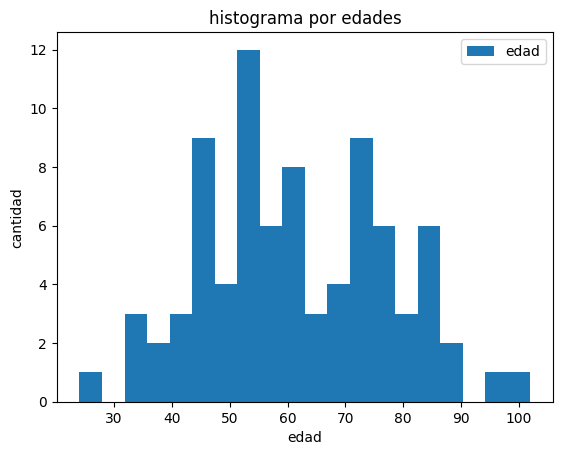

In [0]:
clases, cantidad = df04.groupby('edad').count().select('count').rdd.flatMap(lambda x: x).histogram(20)
plt.hist(clases[: -1], bins = clases, weights = cantidad)
plt.ylabel('cantidad')
plt.xlabel('edad')
plt.title('histograma por edades')
plt.legend(['edad'], loc='upper right')

plt.show()

#se genera un histograma para observar la distribución de las edades

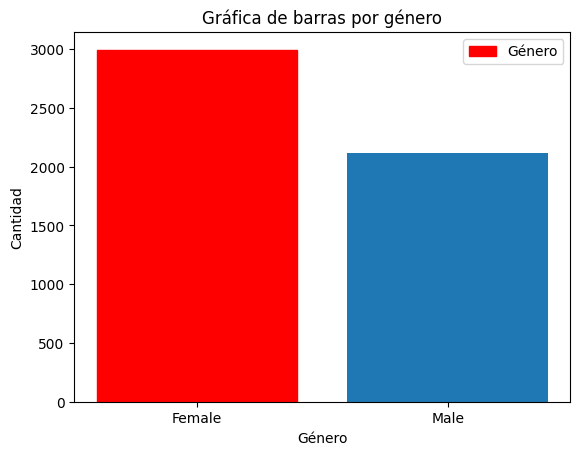

In [0]:

genero_df = df04.groupBy('genero').count().orderBy('genero')

genero_df = genero_df.filter(col('genero') != 'Other')
categoria = [row['genero'] for row in genero_df.collect()]  
genero = [row['count'] for row in genero_df.collect()] 

grafica = plt.bar(categoria, genero)

grafica[0].set_color('r')

plt.ylabel('Cantidad')
plt.xlabel('Género')
plt.title('Gráfica de barras por género')
plt.legend(['Género'], loc='upper right')

plt.show()

#se genera un diagrama de barras para observar la cantidad de personas que hay por género


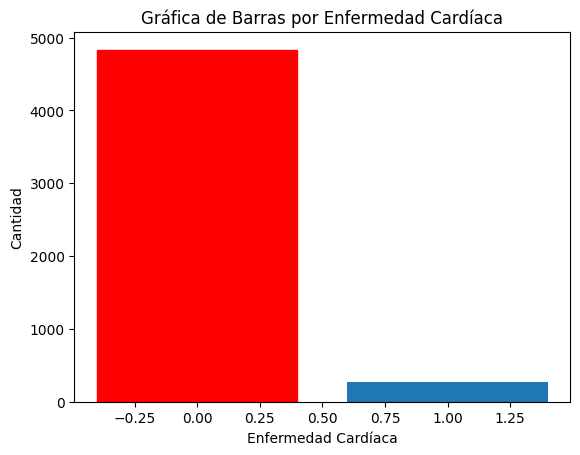

In [0]:

df_cardio = df04.groupBy("enfCardiaca").count().orderBy("enfCardiaca")

categoria = [row['enfCardiaca'] for row in df_cardio.collect()]  
enfCardiaca = [row['count'] for row in df_cardio.collect()] 

grafica = plt.bar(categoria, enfCardiaca)

grafica[0].set_color('r')

plt.ylabel('Cantidad')
plt.xlabel('Enfermedad Cardíaca')
plt.title('Gráfica de Barras por Enfermedad Cardíaca')

plt.show()

#grafico de barras para observar la distribución de las personas que poseen o no enfermedades cardiacas


In [0]:
spark

---------------------------------------------------------------------------
PySparkTypeError                          Traceback (most recent call last)
File <command-2448543509588220>, line 1
----> 1 avg10f = df02.where((col('genero' == lit('Female'))) & (col('edad') < 10)).select(mean(col('IMC'))).collect()
      2 avg20f = df02.where((col('genero' == lit('Female'))) & (col('edad') > 10) & (col('edad') < 20)).select(mean(col('IMC'))).collect()
      3 avg30f = df02.where((col('genero' == lit('Female'))) & (col('edad') > 10) & (col('edad') < 30)).select(mean(col('IMC'))).collect()

File /databricks/spark/python/pyspark/sql/utils.py:264, in try_remote_functions.<locals>.wrapped(*args, **kwargs)
    262     return getattr(functions, f.__name__)(*args, **kwargs)
    263 else:
--> 264     return f(*args, **kwargs)

File /databricks/spark/python/pyspark/sql/functions/builtin.py:256, in col(col)
    229 @_try_remote_functions
    230 def col(col: str) -> Column:
    231     """
    232     R